In [1]:
# Import signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Import sim functions
from neurodsp.sim.combined import sim_combined, sim_peak_oscillation
from neurodsp.sim.aperiodic import sim_powerlaw
from neurodsp.utils import set_random_seed

# Import function to compute power spectra
from neurodsp.spectral import compute_spectrum

# Import utilities for plotting data
from neurodsp.utils import create_times
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series


In [2]:
# Set some general settings, to be used across all simulations
num_signals = 1000
fs = 2000 #sampling 주파수
n_seconds = 2 #simulation 지속시간
times = create_times(n_seconds, fs) #시간 백터

# Define the components of the combined signal to simulate
n_neurons_range = (800, 1200)  # range for number of neurons
firing_rate_range = (2, 4)     # range for firing rate
t_ker_range = (0.8, 1.2)       # range for t_ker
tau_r_range = (0.001, 0.003)   # range for tau_r
tau_d_range = (0.015, 0.025)   # range for tau_d
freq_range = (15, 25)          # range for oscillation frequency
amplitude_range = (5,6)   # range for amplitude_range

# Sample values from the specified ranges
n_neurons = np.random.randint(n_neurons_range[0], n_neurons_range[1] + 1)
firing_rate = np.random.uniform(firing_rate_range[0], firing_rate_range[1])
t_ker = np.random.uniform(t_ker_range[0], t_ker_range[1])
tau_r = np.random.uniform(tau_r_range[0], tau_r_range[1])
tau_d = np.random.uniform(tau_d_range[0], tau_d_range[1])
freq = np.random.uniform(freq_range[0], freq_range[1])


In [3]:
# 초기 (0, 4000) 크기의 빈 numpy 배열 생성
data_signal = np.empty((0, len(times)))
data_signal_with_sine = np.empty((0, len(times)))
data_sine_wave = np.empty((0, len(times)))

In [4]:
for idx in range(num_signals):
    components = {
        'sim_synaptic_current': {
        'n_neurons': n_neurons,
        'firing_rate': firing_rate,
        't_ker': t_ker,
        'tau_r': tau_r,
        'tau_d': tau_d
        },
        'sim_oscillation': {
        'freq': freq
        }
    }
    # Simulate an oscillation over an aperiodic component
    signal = sim_combined(n_seconds, fs, components)
    
    # Generate a 130 Hz sine wave
    t = np.arange(0, n_seconds, 1/fs)
    amplitude = np.random.uniform(amplitude_range[0], amplitude_range[1])
    sine_wave = amplitude * np.sin(2 * np.pi * 130 * t)

    # Add the sine wave to the simulated signal
    signal_with_sine = signal + sine_wave
    
    # Add the signal as a new raw in the numpy array
    data_signal = np.vstack((data_signal, signal))
    data_signal_with_sine = np.vstack((data_signal_with_sine, signal_with_sine))
    data_sine_wave = np.vstack((data_sine_wave, sine_wave))


In [5]:
# data_signal의 shape 확인
print(data_signal.shape)
print(data_signal_with_sine.shape)
print(data_sine_wave.shape)

(1000, 4000)
(1000, 4000)
(1000, 4000)


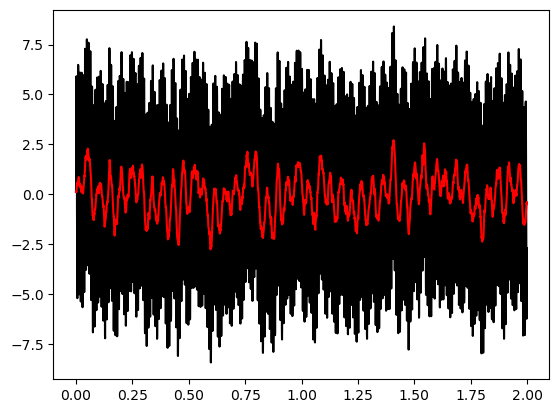

In [6]:
# Plot the first simulated signal
plt.figure()
plt.plot(times, data_signal_with_sine[0, :],'k')
plt.plot(times, data_signal[0, :],'r')

In [7]:
fpath = "./data/"

np.save(fpath + "data_signal" + ".npy", data_signal)
np.save(fpath + "data_sine_wave" + ".npy", data_sine_wave)
np.save(fpath + "data_signal_with_sine" + ".npy", data_signal_with_sine)

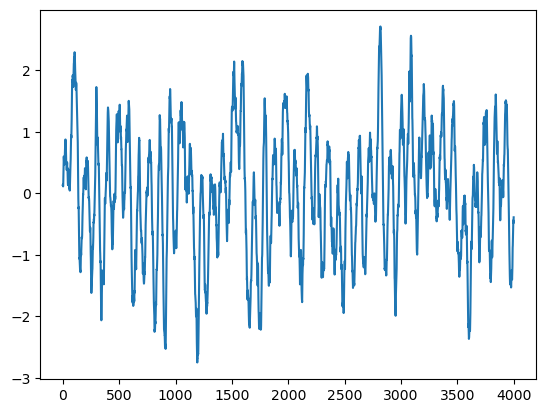

In [8]:
# example for loading data

data_signal = np.load(fpath + "data_signal" + ".npy")
data_sine_wave = np.load(fpath + "data_sine_wave" + ".npy")
data_signal_with_sine = np.load(fpath + "data_signal_with_sine" + ".npy")

plt.plot(data_signal[0, :])